Abel Esteban Ferrer, 1677491

Victor Diaz Armenteros , 1636657

# League Of Legends: PREDICCIÓ DE QUIN EQUIP GUANYA LA PARTIDA.

https://www.kaggle.com/datasets/datasnaek/league-of-legends/code

En aquest notebook, hem portat a terme un anàlisi exhaustiva d'un conjunt de dades de Kaggle sobre les partides de League of Legends. League of Legends és un videojoc de tipus MOBA (Multiplayer Online Battle Arena) que es caracteritza per la seva complexitat i profunditat estratègica. Les partides, jugades entre dos equips de cinc jugadors cadascun, estan influenciades per una gran varietat de factors, com els campions seleccionats, les estratègies d'equip, el rendiment individual, els objectes comprats durant la partida i molt més. El nostre objectiu és investigar aquests factors i veure com afecten el resultat de la partida, concretament el guanyador.

Una de les peculiaritats d'aquest projecte és que, per fer l'anàlisi més complexa i interessant, no ens hem limitat només a l'ús del CSV proporcionat. En comptes d'això, hem incorporat també l'ús de dades extres en format JSON sobre els campions, que ens ofereixen una informació més detallada sobre les característiques individuals de cada campió, les estadístiques, i altres aspectes rellevants. Això ens permet augmentar el conjunt de dades i afegir una capa de profunditat extra en l'anàlisi, ja que cada campió té un conjunt de propietats úniques que poden influir en el desenllaç de la partida. Aquesta inclusió de dades en JSON ha estat una opció conscient per tractar el conjunt de dades de manera més rigorosa i complexa, aprofitant tota la informació disponible.

En el desenvolupament d'aquesta anàlisi, hem utilitzat una sèrie de tècniques per a la selecció i avaluació de models predictius. En primer lloc, hem dividit el conjunt de dades en variables independents (les característiques que influencien el resultat de la partida) i una variable dependent (el guanyador de la partida). Després, hem aplicat diversos models de classificació, com els arbres de decisió i el Random Forest, per tal de veure quin model ofereix millor rendiment en la predicció del guanyador de la partida.

A més a més, hem explorat diverses tècniques per optimitzar els hiperparàmetres dels nostres models. La selecció dels hiperparàmetres adequats és crucial per millorar el rendiment dels models i evitar el sobreajustament (overfitting). Per això, hem utilitzat mètodes com la cerca en graella (grid search) per trobar les combinacions de paràmetres més efectives, així com tècniques d'avaluació de models com la matriu de confusió i el ROC AUC, que ens permeten mesurar de manera objectiva l'eficàcia de les nostres prediccions.

En aquest context, també hem realitzat un anàlisi exploratori de dades (EDA) per entendre millor les relacions entre les variables i identificar patrons o tendències que podrien ajudar a millorar les nostres prediccions. Això inclou l'exploració de la durada de les partides, la selecció i els bans de campions, les estadístiques de les partides i altres factors que podrien influir en el resultat final.

En resum, aquest notebook no només analitza les partides de League of Legends des d'un punt de vista estadístic, sinó que també integra una sèrie de tècniques d'anàlisi de dades i machine learning per construir models predictius robustos que ens permetin entendre millor com les característiques de les partides afecten els resultats. Aquest enfocament multidimensional ens permet explorar més en profunditat el joc i obtenir resultats més precisos i útils.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings("ignore")


# Exploració Inicial del dataset, anàlisis i ajustos

El Dataset conté:
- Identificadors: gameId, CreationTime, gameDuration, seasonID
- Resultats per equip: winner, firstBlood, firstTower, firstInhibitor, firstBaron, firstDragon, firstRiftHerald.
- Campions(personatges) i poders(personatges tant de t1 com t2): t1_champ1id a t1_champ5id. 
Bloquejos (tant de t1 com t2): t1_ban1 a t1_ban5

In [53]:
data = pd.read_csv('games.csv')
data

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,3308904636,1503076540231,1944,9,2,1,2,2,0,2,...,10,2,0,4,0,55,-1,90,238,157
51486,3215685759,1496957179355,3304,9,2,1,1,2,2,2,...,11,7,4,4,1,157,55,119,154,105
51487,3322765040,1504029863961,2156,9,2,2,2,2,0,1,...,10,2,0,2,0,113,122,53,11,157
51488,3256675373,1499562036246,1475,9,2,2,2,2,0,2,...,11,3,0,1,0,154,39,51,90,114


In [54]:
num_attributes = data.shape
attribute_names = data.columns.tolist()
tipus = data.dtypes
print("Tamany del Dataset:", num_attributes)
print("Atributss:", attribute_names)
print("-------------------------")
print("Tipus d'atributs:", tipus)


Tamany del Dataset: (51490, 61)
Atributss: ['gameId', 'creationTime', 'gameDuration', 'seasonId', 'winner', 'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1', 't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2', 't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id', 't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1', 't1_champ5_sum2', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills', 't1_dragonKills', 't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3', 't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2', 't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id', 't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1', 't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2', 't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills', 't2_riftHeraldKills', 't2_ban1', 't2_ban2', 't2_ban3', 't2_ban4',

In [55]:
nils = data.isnull().sum()
print("Nils per atribut:") #Aqui no ens serveix de res buscar nils ja que aquest dataset no en te i s'enfoca més en el predict en base a les estadístiques existents amb ús de models i altres tècniques de l'assignatura
print(nils)

Nils per atribut:
gameId          0
creationTime    0
gameDuration    0
seasonId        0
winner          0
               ..
t2_ban1         0
t2_ban2         0
t2_ban3         0
t2_ban4         0
t2_ban5         0
Length: 61, dtype: int64


In [56]:
#Eliminem el gameId, que només es un comptador que no afecta a la partida ni la manera de jugar.
#Eliminem el creationTime, que tampoc afecta al joc.
data = data.drop(['gameId', 'creationTime'], axis=1)
data = data.drop_duplicates()

Te sentit que el balanceig de la variable Winner surti 50%, ja que el 'matchmaking' de cada partida es suposa que es aleatori d'entre totes les persones de nivell similar.

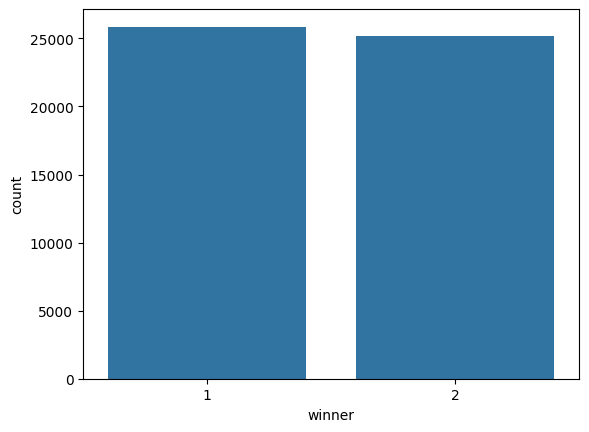

In [57]:
#Mirem el balanceig de la dada a predir 
sns.countplot(data=data, x='winner')
plt.show()


# Preddició fent servir només la informació de la fase de picks i bans

Reporte de clasificación:
              precision    recall  f1-score   support

           1       0.51      0.85      0.64      7757
           2       0.54      0.18      0.27      7559

    accuracy                           0.52     15316
   macro avg       0.53      0.51      0.45     15316
weighted avg       0.53      0.52      0.46     15316



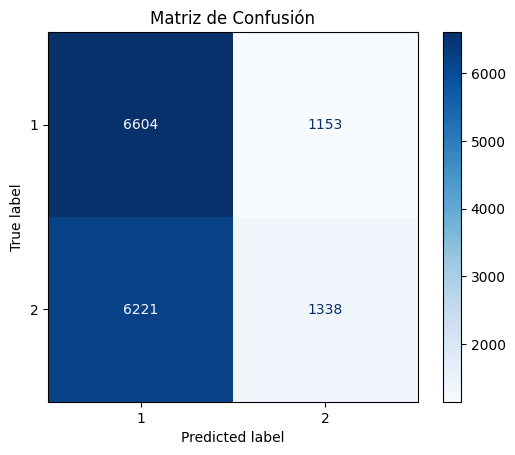

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Seleccionar columnas relevantes
features = [
    't1_champ1id', 't1_champ2id', 't1_champ3id', 't1_champ4id', 't1_champ5id',
    't1_ban1', 't1_ban2', 't1_ban3', 't1_ban4', 't1_ban5',
    't2_champ1id', 't2_champ2id', 't2_champ3id', 't2_champ4id', 't2_champ5id',
    't2_ban1', 't2_ban2', 't2_ban3', 't2_ban4', 't2_ban5'
]
target = 'winner'

# Filtrar las columnas seleccionadas
X = data[features]
y = data[target]

# One-Hot Encoding para variables categóricas
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

X_encoded = encoder.fit_transform(X)

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42, stratify=y)

# Inicializar y entrenar el modelo
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Mostrar la matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Matriz de Confusión")
plt.show()


# Mirem quin tipus de composició te el major winrate

In [59]:
# Fem servir el fitxer de champion_info_2
import json

f = open('champion_info_2.json')
champs_2 = json.load(f)
rows = []
champs_data = pd.DataFrame(columns=['id', 'name'])
for _, champion_data in champs_2['data'].items():
   
    if float(champion_data['id']) < 0:
        continue
    champ_id = int(champion_data['id'])
    name = champion_data['name']
    role = champion_data['tags']
    rows.append({'id': champ_id, 'name': name, 'role': role})
champs_data['name'] = [row['name'] for row in rows]
champs_data['id'] = [row['id'] for row in rows]
champs_data['role'] = [row['role'] for row in rows]
f.close()
champs_data.sort_values('id',inplace=True)
champs_data

,id,name,role
57,1,Annie,[Mage]
52,2,Olaf,"[Fighter, Tank]"
89,3,Galio,"[Tank, Mage]"
73,4,Twisted Fate,[Mage]
112,5,Xin Zhao,"[Fighter, Assassin]"
...,...,...,...
37,429,Kalista,[Marksman]
68,432,Bard,"[Support, Mage]"
43,497,Rakan,[Support]
5,498,Xayah,[Marksman]


# Analitzem les composicions i quin ha sigut l'equip guanyador

In [60]:
# Analizem el winrate i pick/ban rate de cada campió
champs_t1, champs_t2, bans_t1, bans_t2 = [],[],[],[]

for column in data.columns:
    if 'id' in column:
        if 't1' in column and column not in champs_t1:
            champs_t1.append(column)
        elif 't2' in column and column not in champs_t2:
            champs_t2.append(column)
    if 'ban' in column:
        if 't1' in column and column not in bans_t1:
            bans_t1.append(column)
        elif 't2' in column and column not in bans_t2:
            bans_t2.append(column)

data['comp_1'] = data['picks'].apply(lambda x: x[:5])
data['comp_2'] = data['picks'].apply(lambda x: x[5:])


data[['winner','comp_1','comp_2']]

KeyError: 'picks'

KeyError: 'picks'

Mirem quants cops s'ha jugat cada composició tenint en compte els rols

In [ ]:
data_comps = data[['gameId','winner','comp_1','comp_2']]
data_comps = data_comps.explode(['comp_1','comp_2'])

data_comps = pd.merge(data_comps,champs_data.rename(columns={'id': 'comp_1','name':'name_1','role':'role_1'}), on='comp_1', sort=False)


data_comps = pd.merge(data_comps,champs_data.rename(columns={'id': 'comp_2','name':'name_2','role':'role_2'}), on='comp_2', sort=False)

data_comps = data_comps.sort_values('gameId')

# Trobem la composició en funció de cada gameID
data_comps = data_comps.groupby('gameId').agg(
    {'comp_1': list, 
     'comp_2': list,
     'name_1': list,
     'name_2': list,
     'role_1': lambda x: [x.tolist()], 
     'role_2': lambda x: [x.tolist()], 
     'winner': 'first'
    }
).reset_index()

data_comps

def unnest_array(array):
    unnested_array = sorted([item for sublist in array for sublist_2 in sublist for item in sublist_2], key=lambda x: x.lower())
    return sorted(list(set(unnested_array)), key=lambda x: x.lower())

data_comps['role_1'] = data_comps['role_1'].apply(unnest_array)
data_comps['role_2'] = data_comps['role_2'].apply(unnest_array)


data_comps['name_1'] = data_comps['name_1'].apply(sorted)
data_comps['name_2'] = data_comps['name_2'].apply(sorted)

#Trobem els rols més pickejats
data_comps['role_1'] = data_comps['role_1'].astype(str)
data_comps['role_2'] = data_comps['role_2'].astype(str)
pd.concat([data_comps['role_1'],data_comps['role_2']]).value_counts()

KeyError: "['comp_1', 'comp_2'] not in index"

# Filtrem les composicions més jugades per nom

In [ ]:
# Trobem els campions mes pickejats per composició
data_comps['name_1'] = data_comps['name_1'].astype(str)
data_comps['name_2'] = data_comps['name_2'].astype(str)


pd.concat([data_comps['name_1'],data_comps['name_2']]).value_counts()

['Karma', 'Kayle', 'Master Yi', 'Orianna', 'Vayne']    4
['Lee Sin', 'Ornn', 'Rakan', 'Xayah', 'Zed']           3
['Kayn', 'Rakan', 'Swain', 'Xayah', 'Zed']             3
['Jhin', 'Lee Sin', 'Leona', 'Orianna', 'Renekton']    3
['Kayn', 'Lux', 'Rakan', 'Teemo', 'Xayah']             3
                                                      ..
['Akali', 'Fizz', 'Gragas', 'Rakan', 'Xayah']          1
['Fiora', 'Karthus', 'Kayn', 'Soraka', 'Twitch']       1
['Kassadin', 'Quinn', "Rek'Sai", 'Taric', 'Twitch']    1
['Ekko', 'Garen', 'Jax', 'Jinx', 'Morgana']            1
['Diana', 'Jax', 'Lee Sin', 'Soraka', 'Varus']         1
Name: count, Length: 101464, dtype: int64

Veiem que és curiós que només es repeteixi 4 vegades, però té sentit, ja que molts campions poden ser jugats per l'equip enemic o ser bloquejats (baneats). Per tant, no és tan comú que es repeteixi una composició.

In [ ]:
data_comps_winrate = data_comps[data_comps['role_1'] != data_comps['role_2']]
results_data = []

for _, row in data_comps_winrate.iterrows():
    comp_winner = row['role_' + str(row['winner'])]
    comp_loser = row['role_' + str(row['winner'] % 2 + 1)]
    
    results_data.append({'comp': comp_winner, 'winner': 1})
    results_data.append({'comp': comp_loser, 'winner': 0})

results = pd.DataFrame(results_data)

In [ ]:
comp_report = results.groupby('comp').agg({
    'winner': ['sum','count']
})

comp_report['winner','winrate'] = round(100*comp_report['winner']['sum']/comp_report['winner']['count'],2)

comp_report.sort_values(('winner','winrate'),ascending=False)

winner               
                                                      sum  count winrate
comp                                                                    
['Fighter', 'Marksman', 'Support']                      3      4   75.00
['Assassin', 'Fighter', 'Support']                      2      3   66.67
['Assassin', 'Marksman', 'Support', 'Tank']             2      3   66.67
['Fighter', 'Marksman', 'Tank']                        28     47   59.57
['Assassin', 'Fighter', 'Support', 'Tank']             21     36   58.33
['Fighter', 'Mage', 'Tank']                             7     13   53.85
['Assassin', 'Fighter', 'Mage', 'Support']             66    126   52.38
['Assassin', 'Mage', 'Marksman', 'Tank']               28     54   51.85
['Assassin', 'Fighter', 'Mage', 'Marksman', 'Su...  13240  25570   51.78
['Fighter', 'Mage', 'Marksman', 'Tank']               495    987   50.15
['Mage', 'Marksman', 'Support']                        16     32   50.00
['Assassin', 'Mage', 'Marksman']                        7     14   50.00
['Assassin', 'Fighter', 'Tank']                        11     22   50.00
['Mage', 'Support', 'Tank']                             1      2   50.00
['Fighter', 'Mage', 'Marksman', 'Support']            323    647   49.92
['Assassin', 'Mage', 'Marksman', 'Support', 'Ta...    431    867   49.71
['Assassin', 'Fighter', 'Mage', 'Marksman', 'Su...   7728  15551   49.69
['Assassin', 'Fighter', 'Mage', 'Marksman', 'Ta...   3999   8065   49.58
['Fighter', 'Mage', 'Marksman', 'Support', 'Tank']   4669   9543   48.93
['Assassin', 'Fighter', 'Mage', 'Support', 'Tank']    258    532   48.50
['Assassin', 'Fighter', 'Mage', 'Marksman']           558   1160   48.10
['Assassin', 'Fighter', 'Marksman', 'Support', ...   2135   4446   48.02
['Fighter', 'Marksman', 'Support', 'Tank']            101    211   47.87
['Assassin', 'Fighter', 'Marksman', 'Support']        498   1041   47.84
['Assassin', 'Mage', 'Marksman', 'Support']           162    341   47.51
['Assassin', 'Fighter', 'Mage']                         8     17   47.06
['Assassin', 'Fighter', 'Mage', 'Tank']                80    173   46.24
['Assassin', 'Fighter', 'Marksman', 'Tank']           821   1791   45.84
['Mage', 'Marksman', 'Support', 'Tank']               129    286   45.10
['Assassin', 'Fighter', 'Marksman']                    24     66   36.36
['Fighter', 'Mage', 'Support', 'Tank']                 39    111   35.14
['Fighter', 'Mage', 'Support']                          1      3   33.33
['Fighter', 'Mage', 'Marksman']                         4     14   28.57
['Fighter', 'Support', 'Tank']                          0      4    0.00
['Fighter', 'Tank']                                     0      1    0.00
['Assassin', 'Marksman', 'Support']                     0      2    0.00
['Mage', 'Marksman', 'Tank']                            0      4    0.00
['Assassin', 'Mage', 'Support']                         0      1    0.00

Hem classificat el tipus de composició segons el rol que té cada campió i trobem quin es el percentatge de winrate que té aquella composició filtrada per rol de cada jugador. Veiem que a rols pocs comuns que es repeteixen el winrate es molt baix, i composicons que son considerades 'normals' son les mes jugades amb molta diferencia, pero no son les que mes winrate tenen, tot i que les composicions de winrate alt no son significatives ja que hi ha poques mostres.

# TEMPS DE LES PARTIDES I ANÀLISIS DELS REMAKES



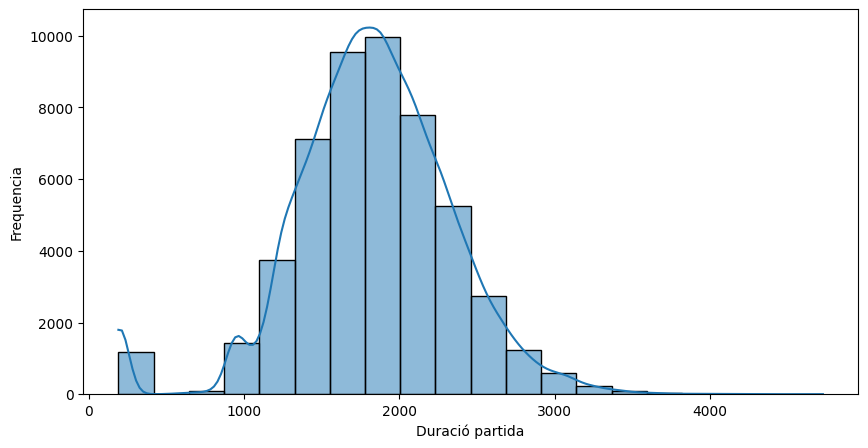

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data = data['gameDuration'], bins=20, kde=True)  # Use kde=False to remove the kernel density estimate
plt.xlabel('Duració partida')
plt.ylabel('Frequencia')
plt.show()

És necessari tindre en compte que en el LOL les partides poden defer-se abans del minut 3 degut a jugadors inactius abans d'aquesta estona. Amb això el que fan es no penalitzar als altres jugadors tenint a un company que no aporta res i quedant en inferioritat. A partir del min 15, ja no afecta tant aquesta desaparició d'una persona, per tant, no permet fer remakes però si rendirse de manera voluntaria. És per això que eliminarem les partides on hi ha un remake al no aportar-nos res a l'anàlisis.

Amb l'anàlisis conseguim treure'ns de sobre 1301 partides inútils de cara al estudi futur.

In [ ]:
remake = data[data['gameDuration'] <= 300].shape[0]
between_remake_and_surrender = data[((data['gameDuration'] > 300) & (data['gameDuration']<900))].shape[0]

print("Partides amb remake: ",remake)
print("Partides entre remake i rendirse: ", between_remake_and_surrender)

data = data[data['gameDuration'] >= 900]
print(f"Total de partides amb gameDuration >= 900: {data.shape[0]}")



Partides amb remake:  1187
Partides entre remake i rendirse:  114
Total de partides amb gameDuration >= 900: 49752


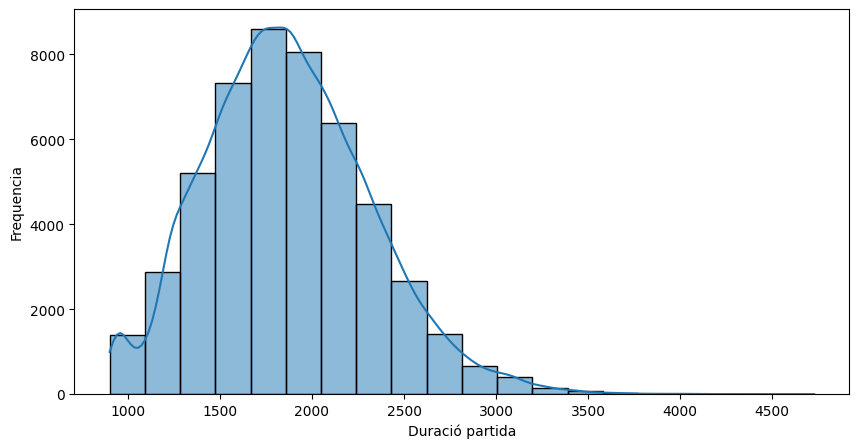

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data = data['gameDuration'], bins=20, kde=True)  # Use kde=False to remove the kernel density estimate
plt.xlabel('Duració partida')
plt.ylabel('Frequencia')
plt.show()

# Anàlisis de la correlació entre variables que són més decisives en una partida de League Of Legends


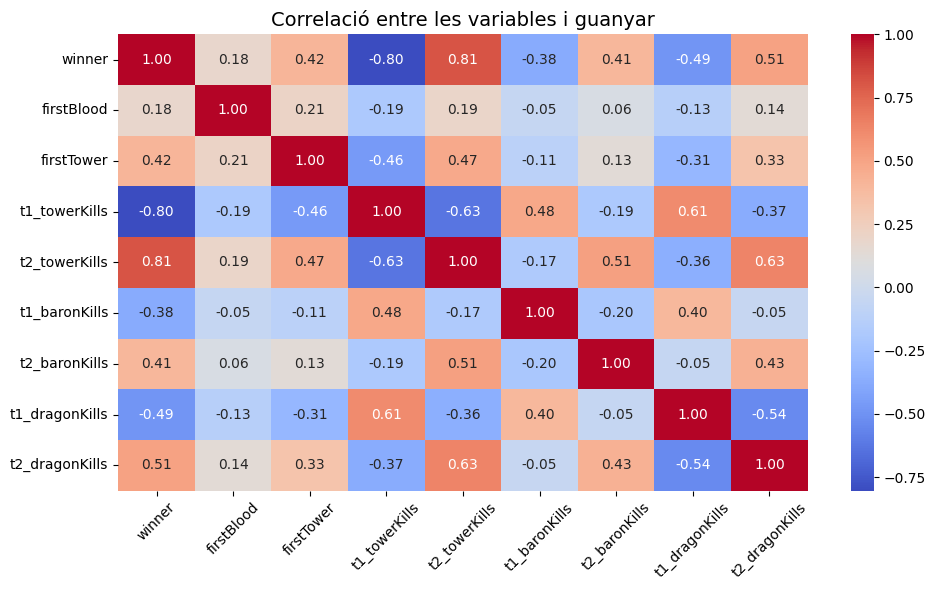

In [ ]:
cols_to_corr = ['winner', 'firstBlood', 'firstTower', 't1_towerKills', 't2_towerKills',
                't1_baronKills', 't2_baronKills', 't1_dragonKills', 't2_dragonKills']

# Calcular matriz de correlación solo con estas columnas
corr = data[cols_to_corr].corr()

plt.figure(figsize=(10, 6))  # Ajusta tamany
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 10}, cbar=True)
plt.title("Correlació entre les variables i guanyar", fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Anàlisis de la correlació:

1. Interpretació de les variables principals:
- `winner` (variable objectiu):
  - Relació positiva amb `t2_towerKills` (0.79) i `t2_dragonKills` (0.50): L'equip 2 té més probabilitats de guanyar si destrueix més torres i mata més dracs.
  - Relació negativa amb `t1_towerKills` (-0.77) i `t1_dragonKills` (-0.47): Si l'equip 1 destrueix més torres o mata més dracs, augmenten les seves probabilitats de guanyar.

- `firstBlood` (primera sang):
  - Correlació baixa amb `winner` (0.18): Aconseguir la primera sang té poca influència en guanyar el joc.

- `firstTower` (primera torre destruïda):
  - Correlació positiva moderada amb `winner` (0.38): Destruir la primera torre té un impacte en la probabilitat de guanyar, tot i que no és decisiu.

- `t1_towerKills` i `t2_towerKills` (torres destruïdes per cada equip):
  - `t2_towerKills` té la correlació més forta amb `winner` (0.79), mostrant que destruir torres és un factor crucial per guanyar.
  - `t1_towerKills` té una forta correlació negativa amb `winner` (-0.77), reafirmant que si l'equip 1 destrueix més torres, és més probable que guanyi.

- Dracs i Barons (`t1_dragonKills`, `t2_dragonKills`, `t1_baronKills`, `t2_baronKills`):
  - Els dracs tenen més correlació amb `winner` que els barons:
    - `t2_dragonKills` (0.50) correlaciona positivament amb `winner`.
    - Els barons tenen correlacions més baixes (`t2_baronKills` 0.40 i `t1_baronKills` -0.37).

2. Conclusions:
- Destruir torres és el factor més important relacionat amb guanyar un joc, ja que té les correlacions més altes (positiva per a un equip i negativa per a l'altre).
- Els dracs també tenen un impacte rellevant, més que els barons.
- Accions inicials com la primera sang o destruir la primera torre tenen impacte, però no són tan decisives com els objectius majors (torres i dracs).


# Nous camps
Creem un conjunt de columnes que indiquen la diferencia de les puntuacions dels dos equips en els diferents ambits de la partida. Això ajuda molt a l'anàlisis ja que tindre superioritat en positiu o negatiu en aquests camps, implica una certa avantatge de cara a guanyar.

In [ ]:
data['tower_diff'] = data['t1_towerKills'] - data['t2_towerKills']
data['inhibitor_diff'] = data['t1_inhibitorKills'] - data['t2_inhibitorKills']
data['baron_diff'] = data['t1_baronKills'] - data['t2_baronKills']
data['dragon_diff'] = data['t1_dragonKills'] - data['t2_dragonKills']
data['riftHerald_diff'] = data['t1_riftHeraldKills'] - data['t2_riftHeraldKills']

# MODELS I AVALUACIÓ

Resultados de Evaluación de Modelos:

Modelo: Logistic Regression
Reporte de Clasificación:
              precision    recall  f1-score       support
1              0.556950  0.622964  0.588110   7551.000000
2              0.560648  0.492610  0.524432   7375.000000
accuracy       0.558556  0.558556  0.558556      0.558556
macro avg      0.558799  0.557787  0.556271  14926.000000
weighted avg   0.558777  0.558556  0.556646  14926.000000
ROC AUC Score: 0.5804

Modelo: Random Forest
Reporte de Clasificación:
              precision    recall  f1-score       support
1              0.976995  0.972984  0.974985   7551.000000
2              0.972455  0.976542  0.974494   7375.000000
accuracy       0.974742  0.974742  0.974742      0.974742
macro avg      0.974725  0.974763  0.974740  14926.000000
weighted avg   0.974751  0.974742  0.974743  14926.000000
ROC AUC Score: 0.9973

Modelo: Linear SVM
Reporte de Clasificación:
              precision    recall  f1-score       support
1              

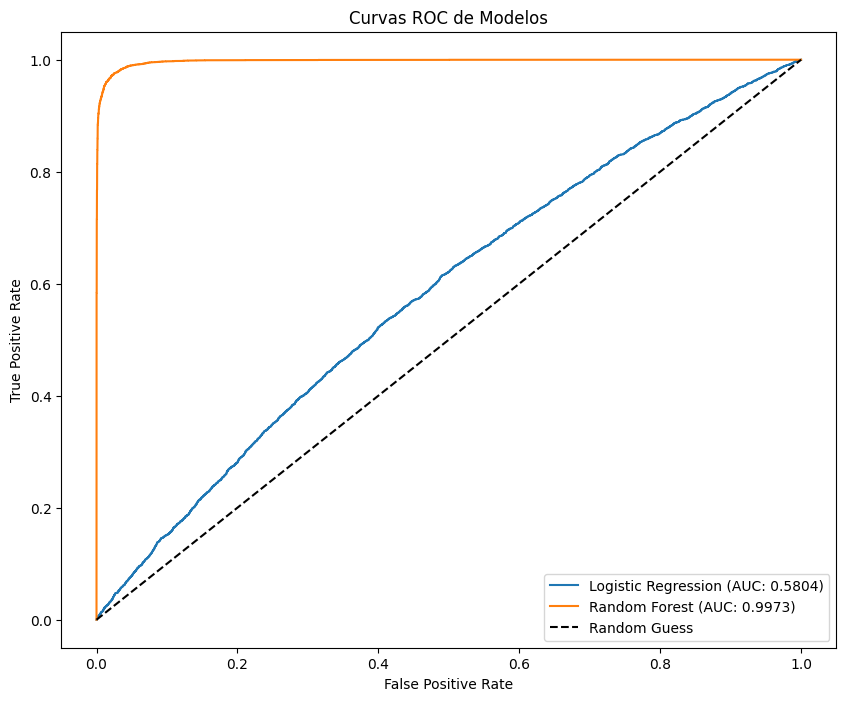

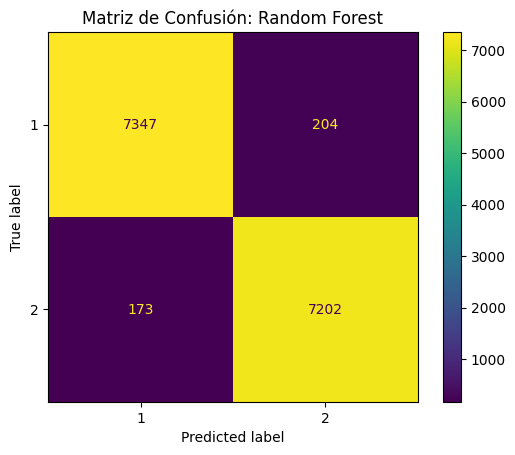

In [ ]:
#Tenim +5000 linies al csv, així que agafem menys perquè sino el nostre ordinador peta.
data_sample = data.sample(frac=0.01, random_state=42)  # Usa el 2% de los datos

# Definir variables predictoras (X) y la columna objetivo (y)
X = data.drop(columns=["winner"])  # Asegúrate de ajustar esto según tus columnas
y = data["winner"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40, stratify=y)

# Inicializar modelos
models = {
    "Logistic Regression": LogisticRegression(max_iter=2, random_state=40),
    "Random Forest": RandomForestClassifier(n_estimators=20, max_depth=10, random_state=40),
    "Linear SVM": LinearSVC(random_state=40),
}

# Diccionario para almacenar resultados
results = {}

# Entrenamiento y evaluación de modelos
for name, model in models.items():
    model.fit(X_train, y_train)  # Entrenar el modelo
    y_pred = model.predict(X_test)  # Predicciones
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None  # Probabilidades
    
    # Reporte de clasificación
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # ROC AUC
    auc_score = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    
    # Guardar resultados
    results[name] = {
        "classification_report": report,
        "roc_auc_score": auc_score,
        "confusion_matrix": confusion_matrix(y_test, y_pred),
    }

# Visualizar métricas clave y comparar modelos
print("Resultados de Evaluación de Modelos:")
for name, result in results.items():
    print(f"\nModelo: {name}")
    print("Reporte de Clasificación:")
    print(pd.DataFrame(result["classification_report"]).transpose())
    if result["roc_auc_score"] is not None:
        print(f"ROC AUC Score: {result['roc_auc_score']:.4f}")

# Graficar Curvas ROC
plt.figure(figsize=(10, 8))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba, pos_label=2)
        plt.plot(fpr, tpr, label=f"{name} (AUC: {results[name]['roc_auc_score']:.4f})")

plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC de Modelos")
plt.legend()
plt.show()

# Mostrar una matriz de confusión para el mejor modelo
best_model_name = max(results, key=lambda x: results[x]["roc_auc_score"] or 0)
best_conf_matrix = results[best_model_name]["confusion_matrix"]
ConfusionMatrixDisplay(best_conf_matrix, display_labels=models[best_model_name].classes_).plot()
plt.title(f"Matriz de Confusión: {best_model_name}")
plt.show()


Anàlisis del resultat dels models i corves: 
Ejes:
El eje X (False Positive Rate, Tasa de Falsos Positivos): Representa la proporción de instancias negativas que se clasifican incorrectamente como positivas.
El eje Y (True Positive Rate, Tasa de Verdaderos Positivos): Representa la proporción de instancias positivas clasificadas correctamente.

Curva ROC del modelo "Random Forest": Es la curva naranja.
Tiene un AUC de 0.9966, lo que indica que el modelo Random Forest tiene un rendimiento excelente, muy cercano al óptimo (AUC=1). Su curva está muy cerca del vértice superior izquierdo (𝐹𝑃𝑅=0,𝑇𝑃𝑅=1
FPR=0,TPR=1), lo cual significa que tiene un buen balance entre la tasa de verdaderos positivos y la tasa de falsos positivos.

Curva ROC del modelo "Logistic Regression":Es la curva azul.
Tiene un AUC de 0.5813, lo que sugiere un rendimiento bajo, apenas mejor que la línea "Random Guess". Este modelo no separa bien las clases y su capacidad predictiva es limitada.

Línea "Random Guess" (Negra discontinua): Representa el rendimiento de un modelo que adivina aleatoriamente. Su AUC sería 0.5.
Los modelos útiles deberían tener una curva ROC que esté por encima de esta línea.

Conclusión:
El modelo Random Forest es mucho más efectivo en esta tarea, con un AUC cercano a 1, lo que sugiere que predice correctamente casi siempre.
El modelo Logistic Regression tiene un rendimiento modesto, apenas mejor que adivinar al azar.
Basandonos en este gráfico, deberíamos optar por Random Forest como el modelo preferido para este problema.

# Millora amb HIPERPARÀMETRES

Fem ús del GridSearch per a una optimització superior i conseguir resultats més positius que en els models anteriors a seques

In [ ]:
param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=40), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

#{'max_depth': None, 'n_estimators': 200}

KeyboardInterrupt: 

In [ ]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Parámetro de regularización inverso
    'penalty': ['l1', 'l2'],  # Regularización L1 o L2
    'solver': ['liblinear', 'saga'],  # Métodos de optimización
    'max_iter': [100, 200, 300]  # Número máximo de iteraciones
}

grid_search = GridSearchCV(LogisticRegression(random_state=40), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)


{'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
# Usar los mejores hiperparámetros directamente
final_model = LogisticRegression(
    C=100, 
    max_iter=100, 
    penalty='l2', 
    solver='liblinear',
    random_state=40
)

# Entrenar el modelo final con los mejores parámetros
final_model.fit(X_train, y_train)

# Evaluar en el conjunto de prueba
y_pred = final_model.predict(X_test)
print("Accuracy en el test amb els paràmetres obtinguts al Grid:", accuracy_score(y_test, y_pred))



Accuracy en el test amb els paràmetres obtinguts al Grid: 0.5959079283887468


In [ ]:
# Entrenar modelo final con los mejores hiperparámetros
final_model = RandomForestClassifier(max_depth=None, n_estimators=200, random_state=40)
final_model.fit(X_train, y_train)

# Evaluar en el conjunto de prueba
y_pred = final_model.predict(X_test)
print("Accuracy en el test amb els paràmetres obtinguts al Grid:", accuracy_score(y_test, y_pred))

Accuracy en el test amb els paràmetres obtinguts al Grid: 0.6035805626598465


Gràcies a la busqueda d'hiperparametres amb GridSearch, augmentem el accuracy en un 0.002, cosa que extrapolada a l'altre 99% del dataset pot acabar tractant-se d'una millora de segons considerable

# Segona avaluació de predicció amb parametres de 'early game'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Cargar el CSV
data = pd.read_csv("games.csv")  # Ajusta el nombre del archivo según corresponda

# Seleccionar solo las columnas relevantes
features = ["seasonId", "firstBlood", "firstDragon", "firstRiftHerald", "firstTower"]
target = "winner"  # La columna que indica el equipo ganador (1 o 2)
data = data[features + [target]]

# Dividir en predictores (X) y objetivo (y)
X = data[features]
y = data[target]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


Reporte de clasificación:
              precision    recall  f1-score   support

           1       0.72      0.73      0.72      7823
           2       0.72      0.70      0.71      7624

    accuracy                           0.72     15447
   macro avg       0.72      0.72      0.72     15447
weighted avg       0.72      0.72      0.72     15447

Matriz de confusión:
[[5708 2115]
 [2259 5365]]
ROC AUC Score: 0.7854


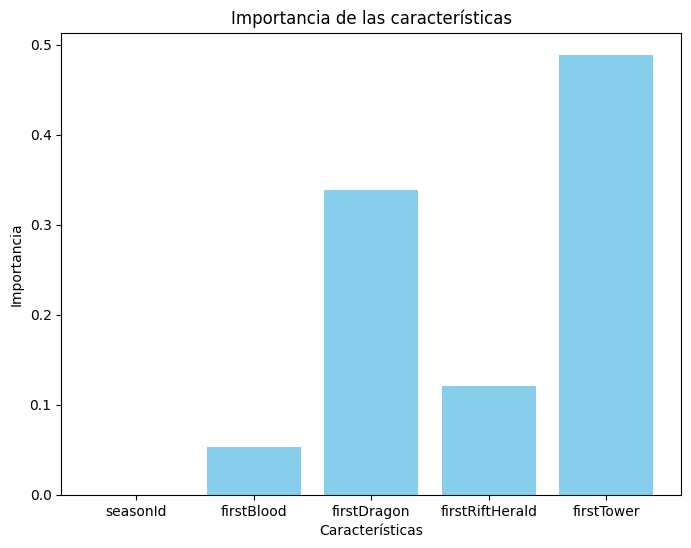

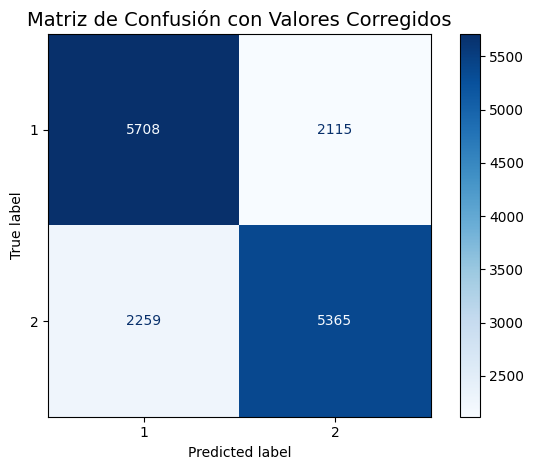

In [ ]:
#Entrenar el modelo
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

#Evaluar el modelo
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

#Métricas de evaluación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}")

#Calcular la matriz de confusión después de hacer las predicciones
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

##Importancia de las características
importances = model.feature_importances_
plt.figure(figsize=(8, 6))
plt.bar(features, importances, color='skyblue')
plt.title("Importancia de las características")
plt.xlabel("Características")
plt.ylabel("Importancia")
plt.show()

#Mostrar la matriz de confusión con anotaciones bien posicionadas
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues", values_format="d")

#Asegurarse de que las posiciones se ajusten correctamente
plt.title("Matriz de Confusión con Valores Corregidos", fontsize=14)
plt.tight_layout()  # Asegura que no haya recortes en la figura
plt.show()
